In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('dummyTxnDump.xlsx')

In [3]:
df.head()

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type
0,4205001.0,MP1,81076,9999999901,cd9b4a28-27d7-4c87-abdf-f74679c3ab1a,2022-04-01,2022-02,2022-06-30,27333,NaN,Business3,type1,924682,District,State,"District ,State",NaN,GT,0.004,46.84376,MT8,4,NaN,ASM1,OUT OF CITY,RT
1,4205002.0,MP5,92559,9999999902,1b26bbba-504d-4661-a955-c8e0d82fdfb2,2022-04-01,2022-02,2022-05-01,8076,ABCD5,NaN,type1,597621,Thane,Maharashtra,"Thane ,Maharashtra",NaN,MT,0.004,12.83852,MT8,5,FOS1,ASM3,OTHER,RT
2,4205003.0,MP1,105357,9999999903,652c0270-4111-4659-ac02-7041113659a0,2022-04-01,2022-02,2022-09-21,45129,ABCD3,NaN,type1,102926,North Twenty Four Parganas,West Bengal,"North Twenty Four Parganas ,West Bengal",NaN,MT,0.004,19.90668,MT9,7,FOS2,ASM4,NO FOS,ST
3,4205004.0,MP6,76924,9999999904,9177979c-67bd-4fc4-8b35-1c5baac5a071,2022-04-01,2022-02,2022-09-17,46637,NaN,Business2,type1,745206,Bangalore,Karnataka,"Bangalore ,Karnataka",NaN,GT,0.004,22.54000,MT7,1,NaN,ASM3,OTHER,ST
4,4205005.0,MP1,17878,9999999905,e8361664-b531-4da7-8165-7ec1874ac7d6,2022-04-01,2022-02,2022-08-26,11700,ABCD5,Business5,type1,697211,Pune,Maharashtra,"Pune ,Maharashtra",NaN,GT,0.004,32.63600,MT3,1,NaN,ASM4,OTHER,RT


In [4]:
## print shape of dataset with rows and columns
print(df.shape)

(1289, 26)


In [5]:
# Missing values
df.isnull().sum()

transaction_id              290
marketplace_name              0
customer_id                   0
telephone_number              0
uuid                       1283
delivered_date                0
transaction_month             0
payment_date                  0
original_invoice_amount       0
credit_limit                197
business_name               203
credit_type                1283
pincode                       0
state                         0
city                          0
Column2                       0
Txn_Type                   1289
GT or MT                      0
MDR                           1
transaction_MDR              23
MktPlaceType                  0
transaction_day               0
fos_name as per DB          459
ASM as per City State       152
Cust type                     0
Bucket_type                   0
dtype: int64

In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [7]:
features_with_na

['transaction_id',
 'uuid',
 'credit_limit',
 'business_name',
 'credit_type',
 'Txn_Type',
 'MDR',
 'transaction_MDR',
 'fos_name as per DB',
 'ASM as per City State']

In [74]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

transaction_id 22.49806 % missing values
uuid 99.53452 % missing values
credit_limit 15.28317 % missing values
business_name 15.74864 % missing values
credit_type 99.53452 % missing values
Txn_Type 100.0 % missing values
MDR 0.07758 % missing values
transaction_MDR 1.78433 % missing values
fos_name as per DB 35.609 % missing values
ASM as per City State 11.79209 % missing values


In [75]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [76]:
print(len(numerical_features))
df[numerical_features].head()

16


,transaction_id,customer_id,telephone_number,delivered_date,payment_date,original_invoice_amount,pincode,Txn_Type,MDR,transaction_MDR,transaction_day,YTDSales,year,month,day,temp_month
0,4205001.0,81076,9999999901,2022-04-01,2022-06-30,27333,924682,NaN,0.004,46.84376,4,27333,2022,4,1,2022-04-01
1,4205002.0,92559,9999999902,2022-04-01,2022-05-01,8076,597621,NaN,0.004,12.83852,5,8076,2022,4,1,2022-04-01
2,4205003.0,105357,9999999903,2022-04-01,2022-09-21,45129,102926,NaN,0.004,19.90668,7,45129,2022,4,1,2022-04-01
3,4205004.0,76924,9999999904,2022-04-01,2022-09-17,46637,745206,NaN,0.004,22.54000,1,46637,2022,4,1,2022-04-01
4,4205005.0,17878,9999999905,2022-04-01,2022-08-26,11700,697211,NaN,0.004,32.63600,1,11700,2022,4,1,2022-04-01


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           999 non-null    float64       
 1   marketplace_name         1289 non-null   object        
 2   customer_id              1289 non-null   int64         
 3   telephone_number         1289 non-null   int64         
 4   uuid                     6 non-null      object        
 5   delivered_date           1289 non-null   datetime64[ns]
 6   transaction_month        1289 non-null   object        
 7   payment_date             1289 non-null   datetime64[ns]
 8   original_invoice_amount  1289 non-null   int64         
 9   credit_limit             1092 non-null   object        
 10  business_name            1086 non-null   object        
 11  credit_type              6 non-null      object        
 12  pincode                  1289 non-

In [78]:
df['YTDSales'] = df.groupby(['delivered_date','marketplace_name','state'])['original_invoice_amount'].cumsum()


In [79]:
df.head()


,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
0,4205001.0,MP1,81076,9999999901,cd9b4a28-27d7-4c87-abdf-f74679c3ab1a,2022-04-01,2022-02,2022-06-30,27333,NaN,Business3,type1,924682,District,State,"District ,State",NaN,GT,0.004,46.84376,MT8,4,NaN,ASM1,OUT OF CITY,RT,27333,2022,4,1,2022-04-01
1,4205002.0,MP5,92559,9999999902,1b26bbba-504d-4661-a955-c8e0d82fdfb2,2022-04-01,2022-02,2022-05-01,8076,ABCD5,NaN,type1,597621,Thane,Maharashtra,"Thane ,Maharashtra",NaN,MT,0.004,12.83852,MT8,5,FOS1,ASM3,OTHER,RT,8076,2022,4,1,2022-04-01
2,4205003.0,MP1,105357,9999999903,652c0270-4111-4659-ac02-7041113659a0,2022-04-01,2022-02,2022-09-21,45129,ABCD3,NaN,type1,102926,North Twenty Four Parganas,West Bengal,"North Twenty Four Parganas ,West Bengal",NaN,MT,0.004,19.90668,MT9,7,FOS2,ASM4,NO FOS,ST,45129,2022,4,1,2022-04-01
3,4205004.0,MP6,76924,9999999904,9177979c-67bd-4fc4-8b35-1c5baac5a071,2022-04-01,2022-02,2022-09-17,46637,NaN,Business2,type1,745206,Bangalore,Karnataka,"Bangalore ,Karnataka",NaN,GT,0.004,22.54000,MT7,1,NaN,ASM3,OTHER,ST,46637,2022,4,1,2022-04-01
4,4205005.0,MP1,17878,9999999905,e8361664-b531-4da7-8165-7ec1874ac7d6,2022-04-01,2022-02,2022-08-26,11700,ABCD5,Business5,type1,697211,Pune,Maharashtra,"Pune ,Maharashtra",NaN,GT,0.004,32.63600,MT3,1,NaN,ASM4,OTHER,RT,11700,2022,4,1,2022-04-01


In [80]:
df.sort_values(by=['payment_date'])


,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
794,4205795.0,MP2,93200,10000000695,NaN,2024-05-06,2022-04,2022-04-01,18244,ABCD2,Business3,NaN,672837,Kollam,Kerala,"Kollam ,Kerala",NaN,MT,0.004,21.19108,MT1,3,NaN,ASM793,OTHER,NT,18244,2024,5,6,2024-05-06
548,4205549.0,MP5,20191,10000000449,NaN,2023-09-03,2022-03,2022-04-01,42629,NaN,Business5,NaN,849829,Senapati,Manipur,"Senapati ,Manipur",NaN,MT,0.004,21.19108,MT3,1,FOS2,ASM547,OUT OF CITY,NT,42629,2023,9,3,2023-09-03
702,4205703.0,MP5,39406,10000000603,NaN,2024-02-04,2022-03,2022-04-01,20592,ABCD4,Business2,NaN,455846,Darbhanga,Bihar,"Darbhanga ,Bihar",NaN,MT,0.004,19.90668,MT1,6,FOS1,ASM701,OUT OF CITY,RT,20592,2024,2,4,2024-02-04
1219,NaN,MP2,32025,10000000899,NaN,2025-07-05,2022-12,2022-04-01,21022,NaN,Business2,NaN,325648,Bageshwar,Uttarakhand,"Bageshwar ,Uttarakhand",NaN,GT,0.004,21.19108,MT4,2,FOS2,NaN,OUT OF CITY,ST,21022,2025,7,5,2025-07-05
546,4205547.0,MP3,89685,10000000447,NaN,2023-09-01,2022-03,2022-04-02,14507,ABCD6,NaN,NaN,422490,Pithoragarh,Uttarakhand,"Pithoragarh ,Uttarakhand",NaN,MT,0.004,22.54000,MT5,6,NaN,ASM545,OUT OF CITY,ST,14507,2023,9,1,2023-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,NaN,MP1,10618,10000000899,NaN,2025-08-23,2022-12,2022-10-30,2346,ABCD6,Business2,NaN,740442,Lakshadweep,Lakshadweep,"Lakshadweep ,Lakshadweep",NaN,GT,0.004,32.63600,MT1,5,NaN,NaN,OTHER,ST,2346,2025,8,23,2025-08-23
455,4205456.0,MP5,99135,10000000356,NaN,2023-06-02,2022-02,2022-10-30,35559,ABCD5,Business4,NaN,659917,Morigaon,Assam,"Morigaon ,Assam",NaN,GT,0.004,46.84376,MT4,2,NaN,ASM454,OUT OF CITY,ST,35559,2023,6,2,2023-06-02
432,4205433.0,MP3,102145,10000000333,NaN,2023-05-10,2022-02,2022-10-30,14840,ABCD2,Business3,NaN,866327,Mandla,Madhya Pradesh,"Mandla ,Madhya Pradesh",NaN,MT,0.004,32.63600,MT2,6,FOS2,ASM431,NO FOS,ST,14840,2023,5,10,2023-05-10
641,4205642.0,MP2,89151,10000000542,NaN,2023-12-05,2022-03,2022-10-30,19672,ABCD2,Business5,NaN,710533,District,State,"District ,State",NaN,MT,0.004,46.84376,MT9,2,FOS2,ASM640,OTHER,NT,19672,2023,12,5,2023-12-05


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           999 non-null    float64       
 1   marketplace_name         1289 non-null   object        
 2   customer_id              1289 non-null   int64         
 3   telephone_number         1289 non-null   int64         
 4   uuid                     6 non-null      object        
 5   delivered_date           1289 non-null   datetime64[ns]
 6   transaction_month        1289 non-null   object        
 7   payment_date             1289 non-null   datetime64[ns]
 8   original_invoice_amount  1289 non-null   int64         
 9   credit_limit             1092 non-null   object        
 10  business_name            1086 non-null   object        
 11  credit_type              6 non-null      object        
 12  pincode                  1289 non-

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           999 non-null    float64       
 1   marketplace_name         1289 non-null   object        
 2   customer_id              1289 non-null   int64         
 3   telephone_number         1289 non-null   int64         
 4   uuid                     6 non-null      object        
 5   delivered_date           1289 non-null   datetime64[ns]
 6   transaction_month        1289 non-null   object        
 7   payment_date             1289 non-null   datetime64[ns]
 8   original_invoice_amount  1289 non-null   int64         
 9   credit_limit             1092 non-null   object        
 10  business_name            1086 non-null   object        
 11  credit_type              6 non-null      object        
 12  pincode                  1289 non-

In [83]:
#for extracting year

In [84]:
df["year"]=df["delivered_date"].dt.year

In [85]:
df.head()

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
0,4205001.0,MP1,81076,9999999901,cd9b4a28-27d7-4c87-abdf-f74679c3ab1a,2022-04-01,2022-02,2022-06-30,27333,NaN,Business3,type1,924682,District,State,"District ,State",NaN,GT,0.004,46.84376,MT8,4,NaN,ASM1,OUT OF CITY,RT,27333,2022,4,1,2022-04-01
1,4205002.0,MP5,92559,9999999902,1b26bbba-504d-4661-a955-c8e0d82fdfb2,2022-04-01,2022-02,2022-05-01,8076,ABCD5,NaN,type1,597621,Thane,Maharashtra,"Thane ,Maharashtra",NaN,MT,0.004,12.83852,MT8,5,FOS1,ASM3,OTHER,RT,8076,2022,4,1,2022-04-01
2,4205003.0,MP1,105357,9999999903,652c0270-4111-4659-ac02-7041113659a0,2022-04-01,2022-02,2022-09-21,45129,ABCD3,NaN,type1,102926,North Twenty Four Parganas,West Bengal,"North Twenty Four Parganas ,West Bengal",NaN,MT,0.004,19.90668,MT9,7,FOS2,ASM4,NO FOS,ST,45129,2022,4,1,2022-04-01
3,4205004.0,MP6,76924,9999999904,9177979c-67bd-4fc4-8b35-1c5baac5a071,2022-04-01,2022-02,2022-09-17,46637,NaN,Business2,type1,745206,Bangalore,Karnataka,"Bangalore ,Karnataka",NaN,GT,0.004,22.54000,MT7,1,NaN,ASM3,OTHER,ST,46637,2022,4,1,2022-04-01
4,4205005.0,MP1,17878,9999999905,e8361664-b531-4da7-8165-7ec1874ac7d6,2022-04-01,2022-02,2022-08-26,11700,ABCD5,Business5,type1,697211,Pune,Maharashtra,"Pune ,Maharashtra",NaN,GT,0.004,32.63600,MT3,1,NaN,ASM4,OTHER,RT,11700,2022,4,1,2022-04-01


In [86]:
#for extracting month 

In [87]:
df["month"]=df["delivered_date"].dt.month

In [88]:
#for extracting day

In [89]:
df["day"]=df["delivered_date"].dt.day

In [90]:
df.head()

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
0,4205001.0,MP1,81076,9999999901,cd9b4a28-27d7-4c87-abdf-f74679c3ab1a,2022-04-01,2022-02,2022-06-30,27333,NaN,Business3,type1,924682,District,State,"District ,State",NaN,GT,0.004,46.84376,MT8,4,NaN,ASM1,OUT OF CITY,RT,27333,2022,4,1,2022-04-01
1,4205002.0,MP5,92559,9999999902,1b26bbba-504d-4661-a955-c8e0d82fdfb2,2022-04-01,2022-02,2022-05-01,8076,ABCD5,NaN,type1,597621,Thane,Maharashtra,"Thane ,Maharashtra",NaN,MT,0.004,12.83852,MT8,5,FOS1,ASM3,OTHER,RT,8076,2022,4,1,2022-04-01
2,4205003.0,MP1,105357,9999999903,652c0270-4111-4659-ac02-7041113659a0,2022-04-01,2022-02,2022-09-21,45129,ABCD3,NaN,type1,102926,North Twenty Four Parganas,West Bengal,"North Twenty Four Parganas ,West Bengal",NaN,MT,0.004,19.90668,MT9,7,FOS2,ASM4,NO FOS,ST,45129,2022,4,1,2022-04-01
3,4205004.0,MP6,76924,9999999904,9177979c-67bd-4fc4-8b35-1c5baac5a071,2022-04-01,2022-02,2022-09-17,46637,NaN,Business2,type1,745206,Bangalore,Karnataka,"Bangalore ,Karnataka",NaN,GT,0.004,22.54000,MT7,1,NaN,ASM3,OTHER,ST,46637,2022,4,1,2022-04-01
4,4205005.0,MP1,17878,9999999905,e8361664-b531-4da7-8165-7ec1874ac7d6,2022-04-01,2022-02,2022-08-26,11700,ABCD5,Business5,type1,697211,Pune,Maharashtra,"Pune ,Maharashtra",NaN,GT,0.004,32.63600,MT3,1,NaN,ASM4,OTHER,RT,11700,2022,4,1,2022-04-01


In [91]:
current_day=datetime.datetime.today().day

In [92]:
current_day 

15

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           999 non-null    float64       
 1   marketplace_name         1289 non-null   object        
 2   customer_id              1289 non-null   int64         
 3   telephone_number         1289 non-null   int64         
 4   uuid                     6 non-null      object        
 5   delivered_date           1289 non-null   datetime64[ns]
 6   transaction_month        1289 non-null   object        
 7   payment_date             1289 non-null   datetime64[ns]
 8   original_invoice_amount  1289 non-null   int64         
 9   credit_limit             1092 non-null   object        
 10  business_name            1086 non-null   object        
 11  credit_type              6 non-null      object        
 12  pincode                  1289 non-

In [94]:
transaction_this_month= df[df['transaction_month']== '2022-12']

In [95]:
transaction_this_month

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
1202,NaN,MP5,55005,10000000899,NaN,2025-06-18,2022-12,2022-09-27,43173,ABCD5,Business4,NaN,350076,Chamoli,Uttarakhand,"Chamoli ,Uttarakhand",NaN,GT,0.004,46.84376,MT5,2,FOS2,NaN,OTHER,RT,43173,2025,6,18,2025-06-18
1203,NaN,MP2,25989,10000000899,NaN,2025-06-19,2022-12,2022-05-12,31667,ABCD6,Business6,NaN,346211,West Khasi Hills,Meghalaya,"West Khasi Hills ,Meghalaya",NaN,GT,0.004,12.83852,MT1,1,NaN,NaN,OTHER,RT,31667,2025,6,19,2025-06-19
1204,NaN,MP2,14222,10000000899,NaN,2025-06-20,2022-12,2022-08-22,2223,ABCD2,Business6,NaN,359333,Bilaspur,Himachal Pradesh,"Bilaspur ,Himachal Pradesh",NaN,GT,0.004,19.90668,MT6,3,FOS2,NaN,OTHER,ST,2223,2025,6,20,2025-06-20
1205,NaN,MP4,27871,10000000899,NaN,2025-06-21,2022-12,2022-07-16,45575,NaN,Business2,NaN,137648,Dimapur,Nagaland,"Dimapur ,Nagaland",NaN,MT,0.004,22.54000,MT4,4,NaN,NaN,NO FOS,RT,45575,2025,6,21,2025-06-21
1206,NaN,MP3,39512,10000000899,NaN,2025-06-22,2022-12,2022-08-05,22165,ABCD2,Business3,NaN,857249,Dhalai,Tripura,"Dhalai ,Tripura",NaN,MT,0.004,32.63600,MT5,6,FOS1,NaN,OUT OF CITY,RT,22165,2025,6,22,2025-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,NaN,MP3,79463,10000000899,NaN,2025-09-08,2022-12,2022-06-22,31723,ABCD2,Business6,NaN,443125,Nicobars,Nicobars,"Nicobars ,Nicobars",NaN,GT,0.004,21.19108,MT6,2,NaN,NaN,NO FOS,NT,31723,2025,9,8,2025-09-08
1285,NaN,MP6,44538,10000000899,NaN,2025-09-09,2022-12,2022-06-06,2224,ABCD3,Business4,NaN,112841,Upper Siang,Upper Siang,"Upper Siang ,Upper Siang",NaN,MT,0.004,21.19108,MT6,5,NaN,NaN,OTHER,ST,2224,2025,9,9,2025-09-09
1286,NaN,MP5,102772,10000000899,NaN,2025-09-10,2022-12,2022-08-08,36626,ABCD4,Business3,NaN,622484,Lahul and Spiti,Lahul and Spiti,"Lahul and Spiti ,Lahul and Spiti",NaN,GT,0.004,21.19108,MT9,3,FOS2,NaN,NO FOS,RT,36626,2025,9,10,2025-09-10
1287,NaN,MP5,93906,10000000899,NaN,2025-09-11,2022-12,2022-07-06,7019,ABCD6,Business3,NaN,749941,Anjaw,Anjaw,"Anjaw ,Anjaw",NaN,MT,0.004,21.19108,MT1,3,FOS1,NaN,NO FOS,ST,7019,2025,9,11,2025-09-11


# MTD CALCULATIONS 

In [96]:
df['temp_month'] = pd.to_datetime(df['delivered_date'], format = "%Y-%m-%d")

In [97]:
df['day'] = [x.day for x in df['temp_month']]

In [98]:
mtd=df[df['day'] < datetime.datetime.today().day]

In [99]:
mtd

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
0,4205001.0,MP1,81076,9999999901,cd9b4a28-27d7-4c87-abdf-f74679c3ab1a,2022-04-01,2022-02,2022-06-30,27333,NaN,Business3,type1,924682,District,State,"District ,State",NaN,GT,0.004,46.84376,MT8,4,NaN,ASM1,OUT OF CITY,RT,27333,2022,4,1,2022-04-01
1,4205002.0,MP5,92559,9999999902,1b26bbba-504d-4661-a955-c8e0d82fdfb2,2022-04-01,2022-02,2022-05-01,8076,ABCD5,NaN,type1,597621,Thane,Maharashtra,"Thane ,Maharashtra",NaN,MT,0.004,12.83852,MT8,5,FOS1,ASM3,OTHER,RT,8076,2022,4,1,2022-04-01
2,4205003.0,MP1,105357,9999999903,652c0270-4111-4659-ac02-7041113659a0,2022-04-01,2022-02,2022-09-21,45129,ABCD3,NaN,type1,102926,North Twenty Four Parganas,West Bengal,"North Twenty Four Parganas ,West Bengal",NaN,MT,0.004,19.90668,MT9,7,FOS2,ASM4,NO FOS,ST,45129,2022,4,1,2022-04-01
3,4205004.0,MP6,76924,9999999904,9177979c-67bd-4fc4-8b35-1c5baac5a071,2022-04-01,2022-02,2022-09-17,46637,NaN,Business2,type1,745206,Bangalore,Karnataka,"Bangalore ,Karnataka",NaN,GT,0.004,22.54000,MT7,1,NaN,ASM3,OTHER,ST,46637,2022,4,1,2022-04-01
4,4205005.0,MP1,17878,9999999905,e8361664-b531-4da7-8165-7ec1874ac7d6,2022-04-01,2022-02,2022-08-26,11700,ABCD5,Business5,type1,697211,Pune,Maharashtra,"Pune ,Maharashtra",NaN,GT,0.004,32.63600,MT3,1,NaN,ASM4,OTHER,RT,11700,2022,4,1,2022-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,NaN,MP3,79463,10000000899,NaN,2025-09-08,2022-12,2022-06-22,31723,ABCD2,Business6,NaN,443125,Nicobars,Nicobars,"Nicobars ,Nicobars",NaN,GT,0.004,21.19108,MT6,2,NaN,NaN,NO FOS,NT,31723,2025,9,8,2025-09-08
1285,NaN,MP6,44538,10000000899,NaN,2025-09-09,2022-12,2022-06-06,2224,ABCD3,Business4,NaN,112841,Upper Siang,Upper Siang,"Upper Siang ,Upper Siang",NaN,MT,0.004,21.19108,MT6,5,NaN,NaN,OTHER,ST,2224,2025,9,9,2025-09-09
1286,NaN,MP5,102772,10000000899,NaN,2025-09-10,2022-12,2022-08-08,36626,ABCD4,Business3,NaN,622484,Lahul and Spiti,Lahul and Spiti,"Lahul and Spiti ,Lahul and Spiti",NaN,GT,0.004,21.19108,MT9,3,FOS2,NaN,NO FOS,RT,36626,2025,9,10,2025-09-10
1287,NaN,MP5,93906,10000000899,NaN,2025-09-11,2022-12,2022-07-06,7019,ABCD6,Business3,NaN,749941,Anjaw,Anjaw,"Anjaw ,Anjaw",NaN,MT,0.004,21.19108,MT1,3,FOS1,NaN,NO FOS,ST,7019,2025,9,11,2025-09-11


# LMTD CALCULATION

In [100]:
df['day'] = [x.day for x in df['temp_month']]
lmtd=df[(df['transaction_month'] == "2022-11") & (df['transaction_day'] < datetime.datetime.today().day)]

In [101]:
lmtd

,transaction_id,marketplace_name,customer_id,telephone_number,uuid,delivered_date,transaction_month,payment_date,original_invoice_amount,credit_limit,business_name,credit_type,pincode,state,city,Column2,Txn_Type,GT or MT,MDR,transaction_MDR,MktPlaceType,transaction_day,fos_name as per DB,ASM as per City State,Cust type,Bucket_type,YTDSales,year,month,day,temp_month
1104,NaN,MP5,35444,10000000899,NaN,2025-03-12,2022-11,2022-08-15,49447,ABCD6,Business2,NaN,128128,Mahendragarh,Haryana,"Mahendragarh ,Haryana",NaN,GT,0.004,19.90668,MT2,5,FOS1,ASM1103,OTHER,RT,49447,2025,3,12,2025-03-12
1105,NaN,MP5,24923,10000000899,NaN,2025-03-13,2022-11,2022-07-18,43352,ABCD5,Business3,NaN,786274,Muktsar,Punjab,"Muktsar ,Punjab",NaN,MT,0.004,22.54000,MT7,1,FOS1,ASM1104,OTHER,ST,43352,2025,3,13,2025-03-13
1106,NaN,MP2,99505,10000000899,NaN,2025-03-14,2022-11,2022-06-18,24908,ABCD4,Business5,NaN,292499,Pakur,Jharkhand,"Pakur ,Jharkhand",NaN,MT,0.004,32.63600,MT6,1,NaN,ASM1105,OUT OF CITY,NT,24908,2025,3,14,2025-03-14
1107,NaN,MP1,101382,10000000899,NaN,2025-03-15,2022-11,2022-09-15,12983,ABCD2,Business6,NaN,255032,Rewari,Haryana,"Rewari ,Haryana",NaN,GT,0.004,21.19108,MT4,5,FOS1,ASM1106,OUT OF CITY,NT,12983,2025,3,15,2025-03-15
1108,NaN,MP6,17299,10000000899,NaN,2025-03-16,2022-11,2022-09-18,35128,NaN,Business3,NaN,600108,North Delhi,Delhi,"North Delhi ,Delhi",NaN,MT,0.004,22.54000,MT9,4,FOS1,ASM1107,OUT OF CITY,RT,35128,2025,3,16,2025-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,NaN,MP2,4942,10000000899,NaN,2025-06-13,2022-11,2022-05-24,23495,ABCD3,Business4,NaN,200580,Thoubal,Manipur,"Thoubal ,Manipur",NaN,GT,0.004,19.90668,MT2,5,FOS2,NaN,OUT OF CITY,RT,23495,2025,6,13,2025-06-13
1198,NaN,MP6,43785,10000000899,NaN,2025-06-14,2022-11,2022-07-08,28508,ABCD3,Business6,NaN,100682,Doda,Jammu and Kashmir,"Doda ,Jammu and Kashmir",NaN,MT,0.004,22.54000,MT4,1,NaN,NaN,NO FOS,NT,28508,2025,6,14,2025-06-14
1199,NaN,MP5,32193,10000000899,NaN,2025-06-15,2022-11,2022-06-12,24449,ABCD5,Business6,NaN,812760,Aizawl,Mizoram,"Aizawl ,Mizoram",NaN,GT,0.004,32.63600,MT4,2,FOS2,NaN,OTHER,ST,24449,2025,6,15,2025-06-15
1200,NaN,MP3,85262,10000000899,NaN,2025-06-16,2022-11,2022-05-16,14786,ABCD2,Business5,NaN,911375,Jaintia Hills,Meghalaya,"Jaintia Hills ,Meghalaya",NaN,GT,0.004,21.19108,MT4,5,NaN,NaN,NO FOS,ST,14786,2025,6,16,2025-06-16


In [102]:
mtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           466 non-null    float64       
 1   marketplace_name         604 non-null    object        
 2   customer_id              604 non-null    int64         
 3   telephone_number         604 non-null    int64         
 4   uuid                     6 non-null      object        
 5   delivered_date           604 non-null    datetime64[ns]
 6   transaction_month        604 non-null    object        
 7   payment_date             604 non-null    datetime64[ns]
 8   original_invoice_amount  604 non-null    int64         
 9   credit_limit             522 non-null    object        
 10  business_name            517 non-null    object        
 11  credit_type              6 non-null      object        
 12  pincode                  604 non-nu

In [103]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
import seaborn as sns
style.use('fivethirtyeight')

## ploting volume MTD

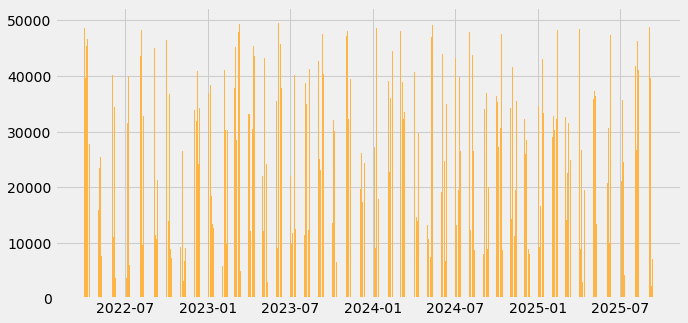

In [104]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(mtd['temp_month'],mtd.YTDSales,color='#ffb546')
plt.savefig('mtd.png')



## PLOTTING LMTD

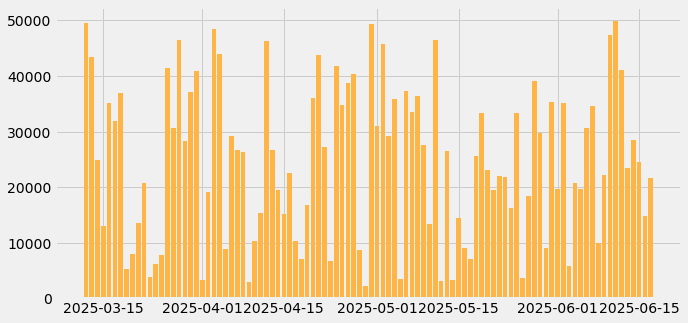

In [105]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(lmtd['temp_month'],lmtd.YTDSales,color='#ffb546')
plt.savefig('lmtd.png')


## MTD Vs LMTD charts for top 6 marketplaces

In [106]:
top6_mtd=mtd.groupby(['temp_month','marketplace_name'])['YTDSales'].nlargest(6)

In [107]:
top6_mtd

temp_month  marketplace_name      
2022-04-01  MP1               2       45129
                              0       27333
                              4       11700
            MP5               28      37038
                              1        8076
                                      ...  
2025-09-08  MP3               1284    31723
2025-09-09  MP6               1285     2224
2025-09-10  MP5               1286    36626
2025-09-11  MP5               1287     7019
2025-09-12  MP5               1288    48423
Name: YTDSales, Length: 604, dtype: int64

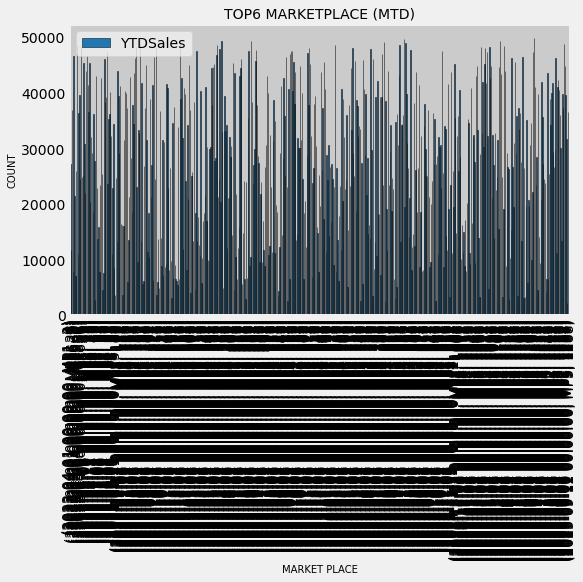

In [108]:
top6_mtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='YTDSales', color='tab:blue', legend= True, )
plt.xlabel('MARKET PLACE', fontsize = 10)
plt.ylabel('COUNT', fontsize = 10)
plt.title('TOP6 MARKETPLACE (MTD)', fontsize = 14)
plt.savefig('top6_mtd.png',dpi=100)


In [109]:
top6_lmtd=lmtd.groupby(['temp_month','marketplace_name'])['YTDSales'].nlargest(6)

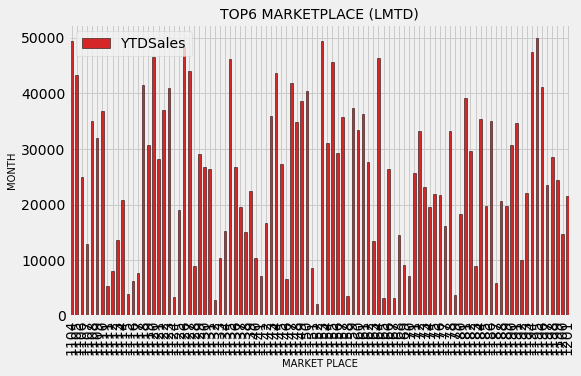

In [110]:
top6_lmtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='temp_months', color='tab:RED', legend= True, )
plt.xlabel('MARKET PLACE', fontsize = 10)
plt.ylabel('MONTH', fontsize = 10)
plt.title("TOP6 MARKETPLACE (LMTD)", fontsize = 14)
plt.savefig('top6_lmtd.png',dpi=100)


## Customers transacted MTD Vs LMTD

In [111]:
ct_mtd=mtd.groupby(['month'])['YTDSales'].count()
ct_mtd

month
1     42
2     42
3     42
4     74
5     56
6     56
7     56
8     56
9     54
10    42
11    42
12    42
Name: YTDSales, dtype: int64

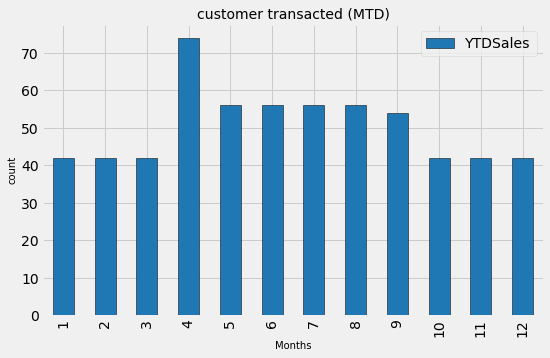

In [112]:
ct_mtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='YTDSales', color='tab:blue', legend= True, )
plt.xlabel('Months', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.title('customer transacted (MTD)', fontsize = 14)
plt.savefig('ct_mtd.png',dpi=100)


In [113]:
ct_lmtd=lmtd.groupby(['month'])['YTDSales'].count()
ct_lmtd

month
3    20
4    30
5    31
6    17
Name: YTDSales, dtype: int64

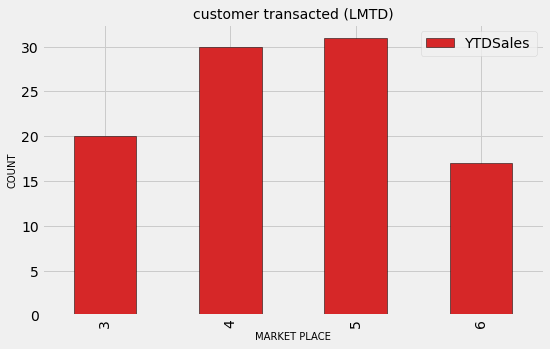

In [114]:
ct_lmtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='YTDSales', color='tab:RED', legend= True, )
plt.xlabel('MARKET PLACE', fontsize = 10)
plt.ylabel('COUNT', fontsize = 10)
plt.title('customer transacted (LMTD)', fontsize = 14)
plt.savefig('ct_lmtd.png',dpi=100)


## Top 6 marketplace 

In [115]:
top6_mp_mtd=(mtd.groupby(['marketplace_name'])['YTDSales'].count()).nlargest(6).sort_values(ascending = False)


In [116]:
top6_mp_mtd

marketplace_name
MP6    108
MP5    106
MP3    100
MP4     99
MP1     96
MP2     95
Name: YTDSales, dtype: int64

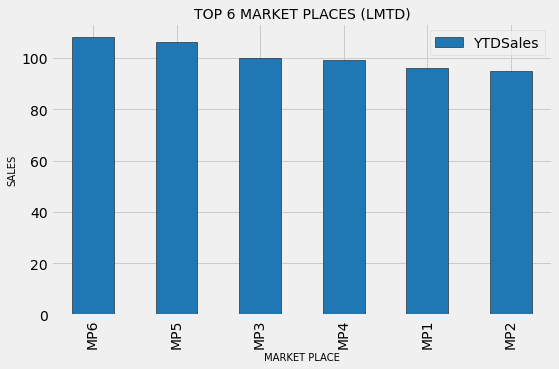

In [117]:
top6_mp_mtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='YTDSales', color='tab:blue', legend= True, )
plt.xlabel('MARKET PLACE', fontsize = 10)
plt.ylabel('SALES', fontsize = 10)
plt.title('TOP 6 MARKET PLACES (LMTD)', fontsize = 14)
plt.savefig('top6_mp_mtd.png',dpi=100)


In [118]:
top6_mp_lmtd=(lmtd.groupby(['marketplace_name'])['YTDSales'].count()).nlargest(6).sort_values(ascending = False)


In [119]:
top6_mp_lmtd

marketplace_name
MP3    21
MP6    19
MP4    18
MP2    16
MP5    13
MP1    11
Name: YTDSales, dtype: int64

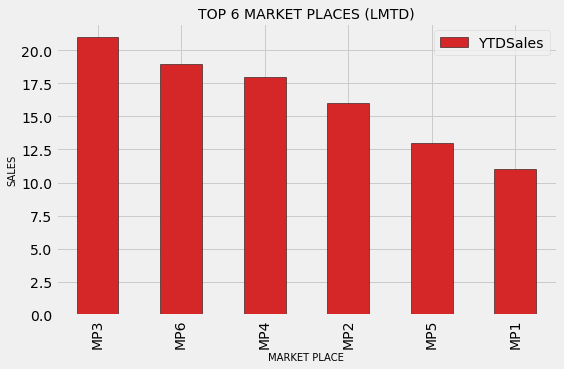

In [120]:
top6_mp_lmtd.plot.bar(figsize=(8, 5), edgecolor='black', x='marketplace_name', y='YTDSales', color='tab:RED', legend= True, )
plt.xlabel('MARKET PLACE', fontsize = 10)
plt.ylabel('SALES', fontsize = 10)
plt.title('TOP 6 MARKET PLACES (LMTD)', fontsize = 14)
plt.savefig('top6_mp_lmtd.png',dpi=100)


### overlap of customers transacted this month Vs customers who have transacted in last 1 month 


In [121]:
df["delivered_date"]=pd.to_datetime(df["delivered_date"])

In [122]:

# current date
today = pd.to_datetime('today')

# create a time window (this month)
this_month = today.replace(day=1)

# create a dataframe of transactions this month
this_month_df = df[df['delivered_date'] >= this_month]

# find customers who have transacted in both dataframes
overlap = this_month_df[this_month_df['customer_id'].isin(df['customer_id'])]

print(overlap)


      transaction_id marketplace_name  customer_id  telephone_number uuid  \
335        4205336.0              MP6        51528       10000000236  NaN   
336        4205337.0              MP2        60658       10000000237  NaN   
337        4205338.0              MP5        16049       10000000238  NaN   
338        4205339.0              MP5        39698       10000000239  NaN   
339        4205340.0              MP5         5518       10000000240  NaN   
...              ...              ...          ...               ...  ...   
1284             NaN              MP3        79463       10000000899  NaN   
1285             NaN              MP6        44538       10000000899  NaN   
1286             NaN              MP5       102772       10000000899  NaN   
1287             NaN              MP5        93906       10000000899  NaN   
1288             NaN              MP5        43898       10000000899  NaN   

     delivered_date transaction_month payment_date  original_invoice_amount

In [123]:
overlap_this_month=len(overlap)

In [124]:
overlap_this_month

954

### overlap of customers transacted this month Vs customers who have transacted in last 2  month 


In [125]:


# Filter the dataframe to only include transactions from this month and the last 2 months
this_month = df[df["delivered_date"].dt.month == 1]
last_3_months = df[(df["delivered_date"].dt.month >= 12) & (df["delivered_date"].dt.month <= 1)]

# Extract the unique customer IDs
this_month_customers = set(this_month["customer_id"].unique())
last_3_months_customers = set(last_3_months["customer_id"].unique())

# Use the intersection method to find the common elements
overlap = this_month_customers.intersection(last_3_months_customers)

# Count the number of common elements
overlap_last_2month = len(overlap)

print("Number of overlapping customers:", overlap_last_2month)


Number of overlapping customers: 0


### overlap of customers transacted this month Vs customers who have transacted in last 3 month 


In [126]:


# Filter the dataframe to only include transactions from this month and the last 3 months
this_month = df[df["delivered_date"].dt.month == 1]
last_3_months = df[(df["delivered_date"].dt.month >= 10) & (df["delivered_date"].dt.month <= 1)]

# Extract the unique customer IDs
this_month_customers = set(this_month["customer_id"].unique())
last_3_months_customers = set(last_3_months["customer_id"].unique())

# Use the intersection method to find the common elements
overlap = this_month_customers.intersection(last_3_months_customers)

# Count the number of common elements
overlap_last_3month = len(overlap)

print("Number of overlapping customers:", overlap_last_3month)


Number of overlapping customers: 0


### overlap of customers transacted this month Vs customers who have transacted in last 4  month 


In [127]:


# Filter the dataframe to only include transactions from this month and the last 4 months
this_month = df[df["delivered_date"].dt.month == 1]
last_3_months = df[(df["delivered_date"].dt.month >= 9) & (df["delivered_date"].dt.month <= 1)]

# Extract the unique customer IDs
this_month_customers = set(this_month["customer_id"].unique())
last_3_months_customers = set(last_3_months["customer_id"].unique())

# Use the intersection method to find the common elements
overlap = this_month_customers.intersection(last_3_months_customers)

# Count the number of common elements
overlap_last_4month = len(overlap)

print("Number of overlapping customers:", overlap_last_4month)


Number of overlapping customers: 0


### Overlap of customers transacted this month Vs customers who have transacted in last 5  month 


In [128]:


# Filter the dataframe to only include transactions from this month and the last 3 months
this_month = df[df["delivered_date"].dt.month == 1]
last_3_months = df[(df["delivered_date"].dt.month >= 8) & (df["delivered_date"].dt.month <= 1)]

# Extract the unique customer IDs
this_month_customers = set(this_month["customer_id"].unique())
last_3_months_customers = set(last_3_months["customer_id"].unique())

# Use the intersection method to find the common elements
overlap = this_month_customers.intersection(last_3_months_customers)

# Count the number of common elements
overlap_last_5month = len(overlap)

print("Number of overlapping customers:", overlap_last_5month)


Number of overlapping customers: 0


## CREATING PRESENTATION

In [129]:
from pptx import Presentation
import pandas as pd
import matplotlib.pyplot as plt
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import os
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE
from pptx.util import Inches

In [130]:
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE
from pptx.util import Inches

# Create a new presentation
prs = Presentation()

# Add a slide
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Define the size and position of the logo
left = Inches(9.0)
top = Inches(0.5)
width = Inches(1.0)
height = Inches(1.0)

# Add the logo to the slide
picture = slide.shapes.add_picture( 'logo.png', left=left, top=top, width=width, height=height)




In [131]:
# Create the presentation object
prs = Presentation()

# Layout Choice for the introduction slide
image_slide_layout = prs.slide_layouts[5]
page = 1

# Create the slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
background = slide.background
fill = background.fill
fill.solid()
fill.fore_color.rgb = RGBColor(0, 32, 96)
# Add Title
title.text = "DAYWISE VOLUME TRACKER"
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)



In [132]:
 #Create  slide 2
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes
# Create Title
title_shape = shapes.title
    
title_shape.text = 'VOLUME- MTD  '
    
 # Add Image    
left = Inches(0.50)
top = Inches(2.25)
pic = slide.shapes.add_picture('mtd.png', left, top, height=Inches(4.5))
#  Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes
# Create Title
title_shape = shapes.title
    
title_shape.text = 'VOLUME -LMTD  '
    
# Add Image    
left = Inches(0.50)
top = Inches(2.25)
pic = slide.shapes.add_picture('lmtd.png', left, top, height=Inches(4.5))

In [133]:
    # Create a slide 4
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    # Create Title
    title_shape = shapes.title
    title_shape.text = ' Top 6 Marketplaces- MTD'
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('top6_mtd.png', left, top, height=Inches(4.5))
    #  Create a slide
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    
    title_shape = shapes.title
    title_shape.text = ' Top 6 Marketplaces- LMTD'
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('top6_lmtd.png', left, top, height=Inches(4.5))

In [134]:
    # Create a slide 5
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    # Create Title
    title_shape = shapes.title
    title_shape.text = 'Customers transacted MTD '
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('ct_mtd.png', left, top, height=Inches(4.5))
    #  Create a slide
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    title_shape = shapes.title
    title_shape.text = 'Customers transacted LMTD'
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('ct_lmtd.png', left, top, height=Inches(4.5))

In [135]:
    #Create a slide 5
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    # Create Title
    title_shape = shapes.title
    title_shape.text = 'Customers transacted for top 6 marketplaces- MTD'
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('top6_mp_mtd.png', left, top, height=Inches(4.5))
    #  Create a slide
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    
    # Create Title
    title_shape = shapes.title
    title_shape.text = 'Customers transacted for top 6 marketplaces- LMTD'
    
    
    # Add Image    
    left = Inches(0.50)
    top = Inches(2.25)
    pic = slide.shapes.add_picture('top6_mp_lmtd.png', left, top, height=Inches(4.5))

In [136]:
# Create a slide 7
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes
# Create Title
title_shape = shapes.title
title_shape.text = 'Customers transacted MTD '
    
# Add Image    
left = Inches(0.50)
top = Inches(2.25)
pic = slide.shapes.add_picture('ct_mtd.png', left, top, height=Inches(4.5))
# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes

# Create Title
title_shape = shapes.title
title_shape.text = 'Customers transacted LMTD'

# Add Image    
left = Inches(0.50)
top = Inches(2.25)
pic = slide.shapes.add_picture('ct_lmtd.png', left, top, height=Inches(4.5))

In [137]:
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
   # Create Title
    title_shape = shapes.title
    title_shape.text = 'Overlapping Customers '
    
# Build the Text Box
    left = Inches(0.75)
    top = Inches(1.5) + Inches(1) 
    width = Inches(9)
    height = Inches(2)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = 'Analysis'
    p.font.size = Pt(18)
    # First bullet point
    p = tf.add_paragraph()
    p.text = '• {} OVERLAPPING CUSTOMER TRANSACTED THIS MONTH'.format(overlap_this_month)
    p.level = 1
    
    p = tf.add_paragraph()
    p.text = '• {} OVERLAPPING CUSTOMER TRANSACTED LAST 2 MONTHS'.format(overlap_last_2month)
    p.level = 1
    
    p = tf.add_paragraph()
    p.text = '• {} OVERLAPPING CUSTOMER TRANSACTED LAST 3 MONTHS'.format(overlap_last_3month)
    p.level = 1
    
    p = tf.add_paragraph()
    p.text = '• {} OVERLAPPING CUSTOMER TRANSACTED LAST 4 MONTHS'.format(overlap_last_4month)
    p.level = 1
    
    p = tf.add_paragraph()
    p.text = '• {} OVERLAPPING CUSTOMER TRANSACTED LAST 5 MONTHS'.format(overlap_last_5month)
    p.level = 1

In [138]:
pwd()

'C:\\Users\\hp\\Desktop\\python practice\\MY PROJECTS\\epay internship\\PPT CREATION'

In [139]:
# Save
prs.save('3.pptx')